#  Chapter22　CNNを用いた画像認識の応用

- **22.1 データの水増し**
    - **22.1.1 ImageDataGenerator**
<br><br>
- **22.2 正規化**
    - **22.2.1 様々な正規化手法**
    - **22.2.2 標準化**
    - **22.2.3 白色化**
    - **22.2.4 バッチ正規化**
<br><br>

- **22.3 転移学習**
    - **22.3.1 転移学習**
    - **22.3.2 VGG16**
<br><br>
- **添削問題**
- **最終添削問題**



## ●22.1 データの水増し

### ○22.1.1 ImageDataGenerator

この項にサンプルはありません

## ●22.2 正規化

### ○22.2.1 様々な正規化手法

この項にサンプルはありません

### ○22.2.2 標準化

#### □問題

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# ジェネレーターを生成してください
datagen = 

# 標準化します
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 生成した画像を見やすくしています
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Standardization result', fontsize=12)
plt.show()

**リスト 22.1：問題**

#### □解答例

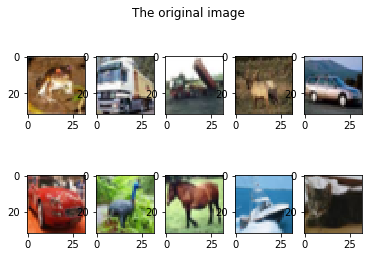

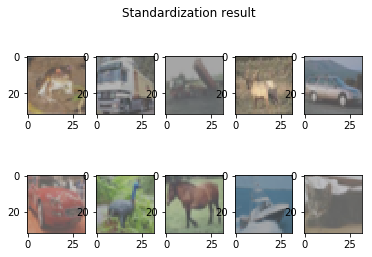

In [4]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# ジェネレーターを生成してください
datagen = ImageDataGenerator(samplewise_center=True, 
                             samplewise_std_normalization=True)

# 標準化します
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 生成した画像を見やすくしています
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Standardization result', fontsize=12)
plt.show()

**リスト 22.2：解答例**

### ○22.2.3 白色化

#### □問題

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# ここでは全データのうち、学習には 300枚、テストには 100枚のデータを使用します
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# ジェネレーターを生成してください
datagen = 

# 白色化します
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 生成した画像を見やすくします
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize=12)
plt.show()

**リスト 22.3：問題**

#### □解答例

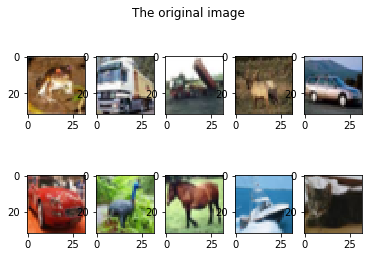

C:\Users\020138\AppData\Local\Continuum\anaconda3\envs\ten\lib\site-packages\keras_preprocessing\image.py:758: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


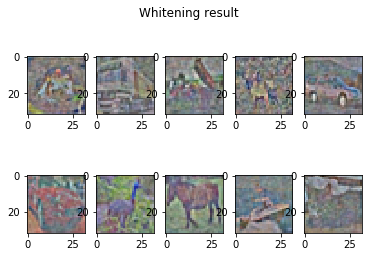

In [7]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# ここでは全データのうち、学習には 300枚、テストには 100枚のデータを使用します
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# ジェネレーターを生成してください
datagen = ImageDataGenerator(zca_whitening=True)

# 白色化します
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 生成した画像を見やすくします
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize=12)
plt.show()

**リスト22.4：解答例**

### ○22.2.4 バッチ正規化

#### □問題

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(a=X_train, newshape=(-1, 28, 28, 1))[:300]
X_test = np.reshape(a = X_test,newshape=(-1, 28, 28, 1))[:300]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:300]

# model1（活性化関数にsigmoid関数を使うモデル）を定義します
model1 = Sequential()
model1.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('sigmoid'))
model1.add(Dense(128))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

# コンパイルします
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 学習させます
history = model1.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 可視化します
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model1', fontsize=12)
plt.show()

# model2（活性化関数にReLUを使うモデル）を定義します
model2 = Sequential()
model2.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
# 以下にバッチ正規化を追加してください

model2.add(Dense(128))
model2.add(Activation('relu'))
# 以下にバッチ正規化を追加してください

model2.add(Dense(10))
model2.add(Activation('softmax'))

# コンパイルします
model2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 学習させます
history = model2.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 可視化します
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model2', fontsize=12)
plt.show()

**リスト 22.5：問題**

#### □解答例

Train on 300 samples, validate on 300 samples
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 2.5468 - acc: 0.0767 - val_loss: 2.3175 - val_acc: 0.1133
Epoch 2/3
300/300 [==============================] - 0s 891us/step - loss: 2.2688 - acc: 0.1400 - val_loss: 2.2246 - val_acc: 0.2400
Epoch 3/3
300/300 [==============================] - 0s 764us/step - loss: 2.1603 - acc: 0.2567 - val_loss: 2.1726 - val_acc: 0.2700


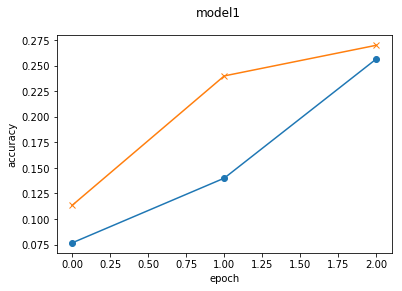

Train on 300 samples, validate on 300 samples
Epoch 1/3
300/300 [==============================] - 1s 3ms/step - loss: 1.6429 - acc: 0.4567 - val_loss: 2.0779 - val_acc: 0.4733
Epoch 2/3
300/300 [==============================] - 0s 1ms/step - loss: 0.7126 - acc: 0.8233 - val_loss: 1.3106 - val_acc: 0.6000
Epoch 3/3
300/300 [==============================] - 0s 951us/step - loss: 0.4134 - acc: 0.8967 - val_loss: 1.1530 - val_acc: 0.6267


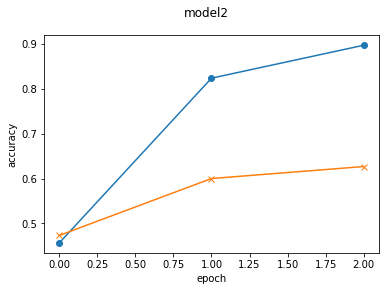

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(a=X_train, newshape=(-1,28,28,1))[:300]
X_test = np.reshape(a = X_test,newshape=(-1,28,28,1))[:300]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:300]

# model1（活性化関数にsigmoid関数を使うモデル）を定義します
model1 = Sequential()
model1.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('sigmoid'))
model1.add(Dense(128))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

# コンパイルします
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 学習させます
history = model1.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 可視化します
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model1', fontsize=12)
plt.show()


# model2（活性化関数にReLUを使うモデル）を定義します
model2 = Sequential()
model2.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
# 以下にバッチ正規化を追加してください
model2.add(BatchNormalization())
model2.add(Dense(128))
model2.add(Activation('relu'))
# 以下にバッチ正規化を追加してください
model2.add(BatchNormalization())
model2.add(Dense(10))
model2.add(Activation('softmax'))

# コンパイルします
model2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 学習させます
history = model2.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 可視化します
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle("model2", fontsize=12)
plt.show()

**リスト 22.6：解答例（出力結果は誌面と異なります）**

## ●22.3 転移学習

### ○22.3.1 転移学習

この項にサンプルはありません

### ○22.3.2 VGG16

In [ ]:
from keras.applications.vgg16 import VGG16

input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

**リスト 22.7：VGG のモデルの作成例（このコードはサンプルなので実行しないてください）**

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

model = Model(inputs=vgg16.input, outputs=top_model)

**リスト 22.8：別のモデルを定義（このコードはサンプルなので実行しないてください）**

In [ ]:
# modelの19層目までがvggのモデル
for layer in model.layers[:19]:
    layer.trainable = False

**リスト 22.9：重みを固定化（このコードはサンプルなので実行しないてください）**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

**リスト 22.10：SGDで最適化（このコードはサンプルなので実行しないてください）**

#### □問題

In [ ]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input_tensorの定義をしてください
input_tensor = 

vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# vgg16とtop_modelを連結してください
model = 

# 19層目までの重みを固定してください


# モデルを確認します
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# すでに学習済みのモデルを保存している場合、以下のように学習済みモデルを取得できます
# model.load_weights('param_vgg.hdf5')

# バッチサイズ32,エポック数3で学習を行っています
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

# 以下の式でモデルを保存することができます
model.save_weights('param_vgg.hdf5')

# 精度を評価します
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# データを可視化します（テストデータの先頭の 10枚）
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=16)
plt.show()

# 予測します（テストデータの先頭の 10 枚）
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

**リスト22.11：問題**

#### □解答例

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

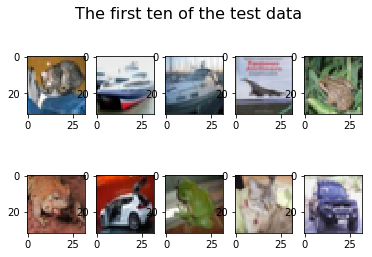

[3 8 9 8 6 6 1 6 6 5]


In [3]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input_tensorの定義をしてください
input_tensor = Input(shape=(32, 32, 3))

vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# vgg16とtop_modelを連結してください
model = Model(inputs=vgg16.input, outputs=top_model)

# 19層目までの重みを固定してください
for layer in model.layers[:19]:
    layer.trainable = False

# モデルを確認します
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# すでに学習済みのモデルを保存している場合、以下のように学習済みモデルを取得できます
# model.load_weights('param_vgg.hdf5')

# バッチサイズ32,エポック数3で学習を行っています
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

# 以下の式でモデルを保存することができます
model.save_weights('param_vgg.hdf5')

# 精度を評価します
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# データを可視化します（テストデータの先頭の 10枚
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=16)
plt.show()

# 予測します（テストデータの先頭の 10 枚）
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

**リスト22.12：解答例（出力結果は誌面と異なります）**

## ●22.5 添削問題

#### □問題

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
% matplotlib inline

# 画像データを読み込みます
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#　画像を表示します
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('original', fontsize=12)
plt.show()

# 拡張する際の設定をしてください（自由に設定してください）
generator = ImageDataGenerator(
                    rotation_range=    , # 〇〇°まで回転します
                    width_shift_range=   , # 水平方向にランダムでシフトさせます
                    height_shift_range=    , # 垂直方向にランダムでシフトさせます
                    channel_shift_range=    , # 色調をランダム変更します
                    shear_range=    , # 斜め方向(pi/8まで)に引っ張ります
                    horizontal_flip=    , # 垂直方向にランダムで反転します
                    vertical_flip=    # 水平方向にランダムで反転します
                    )

# 画像を拡張してください（.flowを使って拡張する画像データを渡してください。表示した時に比較をしたいので、shuffle=Falseを指定してください）
extension = 
X_batch  = 

# 生成した画像を見やすくしています
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

# 拡張した画像を表示します
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('extension', fontsize=12)
plt.show()

**リスト 22.13：問題**

#### □解答例

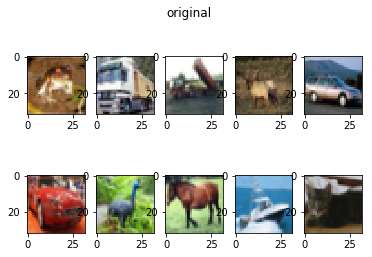

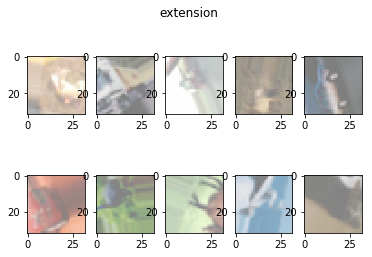

In [4]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
% matplotlib inline

# 画像データを読み込みます
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#　画像を表示します
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('original', fontsize=12)
plt.show()

# 拡張する際の設定をしてください（自由に設定してください）
generator = ImageDataGenerator(
                    rotation_range=90, # 90°まで回転させます
                    width_shift_range=0.3, # 水平方向にランダムでシフトさせます 
                    height_shift_range=0.3, # 垂直方向にランダムでシフトさせます 
                    channel_shift_range=70.0, # 色調をランダム変更します 
                    shear_range=0.39, # 斜め方向（pi/8まで）に引っ張ります
                    horizontal_flip=True, # 垂直方向にランダムで反転します
                    vertical_flip=True # 水平方向にランダムで反転します
                    )

# 画像を拡張してください（.flowを使って拡張する画像データを渡してください。表示した時に比較をしたいので、shuffle=Falseを指定してください）
extension = generator.flow(X_train,shuffle=False)
X_batch = extension.next()

# 生成した画像を見やすくしています
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

# 拡張した画像を表示します
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('extension', fontsize=12)
plt.show()

**リスト 22.14：解答例**

### ●最終添削問題

In [ ]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# データをロードしてください
(X_train, y_train), (X_test, y_test) = 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input_tensorの定義をして、vggのImageNetによる学習済みモデルを作成してください
input_tensor = 
vgg16 = 

# 特徴量抽出部分のモデルを作成しています
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# vgg16とtop_modelを連結してください
model = 

# 以下のfor文を完成させて、15層目までの重みを固定させてください
for layer in :
    layer.trainable =

#　学習の前に、モデル構造を確認してください
model.summary()

# コンパイルをしています
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# すでに学習済みのモデルを保存している場合、以下のように学習済みモデルを取得できます
# model.load_weights('param_vgg_15.hdf5')

# バッチサイズ32で学習を行ってください
model.fit()

# 以下の式でモデルを保存することができます
model.save_weights('param_vgg_15.hdf5')

# 精度の評価をしています
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

**リスト22.15：問題**

In [5]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# データをロードしてください 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input_tensorの定義をして、vggのImageNetによる学習済みモデルを作成してください
input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# 特徴量抽出部分のモデルを作成しています
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# vgg16とtop_modelを連結してください
model = Model(inputs=vgg16.input, outputs=top_model)

# 以下のfor文を完成させて、15層目までの重みを固定させてください
for layer in model.layers[:15]:
    layer.trainable = False

#　学習の前に、モデル構造を確認してください
model.summary()
# コンパイルをしています
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# すでに学習済みのモデルを保存している場合、以下のように学習済みモデルを取得できます
# model.load_weights('param_vgg_15.hdf5')

# バッチサイズ32で学習を行ってください
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

# 以下の式でモデルを保存することができます
model.save_weights('param_vgg_15.hdf5')

# 精度の評価をしています
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

**リスト22.16：解答例（出力結果は誌面と異なります）**